<a href="https://colab.research.google.com/github/shiroiushi/python_ciencia_de_datos_unsa/blob/main/TPFINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TP FINAL

**Ejercicio 1**\
Buscar un dataset (Que no sea los trabajados en clases)

**Ejercicio 2**\
Realizar una introduccion al dataset de que se trata,definir sus variables (Diccionario de datos)

**Ejercicio 3**\
Identificar el tipo de variable,decide justificando su respuesta.

**Ejercicio 4**\
Detectar Valores Ausente  y Valores Atipicos .Decidir si eliminarlos y el por que de la eleccion.

**Ejercicio 5**\
Realizar un analisis univariado y en base a esos graficos,sacar conclusiones.

**Ejercicio 6**\
Realizar analisis de matriz corelacion y explicar que variable estan correlacionadas\

-----

**Ejercicio 1**\
Buscar un dataset (Que no sea los trabajados en clases)

Dataset: https://datasets.imdbws.com/ \
utilizaré el archivo title.basics.tsv

**Ejercicio 2**\
Realizar una introduccion al dataset de que se trata,definir sus variables (Diccionario de datos)

In [ ]:
from google.colab import files
uploaded = files.upload()

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

imdb = '/content/title.basics.tsv'
df = pd.read_csv(imdb, sep='\t')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925122 entries, 0 to 2925121
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   tconst          object 
 1   titleType       object 
 2   primaryTitle    object 
 3   originalTitle   object 
 4   isAdult         float64
 5   startYear       object 
 6   endYear         object 
 7   runtimeMinutes  object 
 8   genres          object 
dtypes: float64(1), object(8)
memory usage: 200.9+ MB


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0.0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0.0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0.0,1893,\N,1,"Comedy,Short"


Este dataset proporciona información detallada sobre películas y series estrenadas a nivel mundial.\
En particular, sus variables almacenan la siguiente información:

*   tconst es una string alfanumérica única que identifica a la producción audovisual.
*   titleType es una string que indica si la producción es un cortometraje, un largometraje, una serie de tv, un episodio de tv, etc
*   primaryTitle es una string con el título popular de la producción audiovisual.
*   originalTitle es una string con el título en su idioma original.
*   isAdult es un booleano que identifica si es contenido para adultos (1) o no (0)
*   startYear son 4 cifras que indican el año de lanzamiento o estreno de la producción.
*   endYear son 4 cifras que indican cuando se terminó de emitir la producción para el caso de series de TV o "\N" para los demás tipos de producciones no seriadas.
*   runtimeMinutes es la duración de la producción audiovisual indicada en minutos.
*   genres es un array de string que incluye hasta 3 géneros audiovisuales en los que se enmarca la producción.


In [66]:
#particularmente me interesa trabajar con los datos de largometrajes estrenados entre el 2018 y el 2022
#que no sean documentales, Realities o que no tengan género definido
#así que voy a generar un df con esta información

df1 = df.loc[(df['titleType'] == 'movie') & ((pd.to_numeric(df['startYear'], errors='coerce') >= 2018) & (pd.to_numeric(df['startYear'], errors='coerce') <= 2022)) &
 (df['genres'] != 'Documentary') & (df['genres'] != 'Reality-TV') & (df['genres'] != r'\N'),
  ['tconst','primaryTitle', 'titleType', 'startYear', 'genres']]

#voy a considerar solo el primer género de los hasta 3 que puede almacenar la variable
df1['genres'] = df1['genres'].str.split(',').str[0]

df1.head()

#NOTA: le pedí ayuda a una amiga programadora
#porque pasar de string a int cuando había valores \N era dificilísimo de resolver para mí solx
#y tampoco sabía el uso de r para tratar la información como una cadena literal
#(crédito para Laura Molina - gracias amiga!)


,tconst,primaryTitle,titleType,startYear,genres
11636,tt0011801,Tötet nicht mehr,movie,2019,Action
61112,tt0062336,The Tango of the Widower and Its Distorting Mi...,movie,2020,Drama
67664,tt0069049,The Other Side of the Wind,movie,2018,Drama
94103,tt0096235,Taxi Killer,movie,2022,Action
108900,tt0111414,A Thin Life,movie,2018,Comedy


**Ejercicio 3**\
Identificar el tipo de variable,decide justificando su respuesta.\

- tconst: Cualitativo nominal. Es un identificador único alfanumérico para cada título, no tiene un orden ni relación entre los valores y solo se utiliza para identificación.

- titleType es cualitativa nominal porque no tiene un orden y se utiliza para categorizar.

- primaryTitle es cualitativo nominal porque no tiene un orden y se utiliza para identificación.

- originalTitle es cualitativa nominalporque no tiene un orden y se utiliza para identificación.

- isAdult es cualitativo nominal porque es un booleano que se utiliza para categorización.

- startYear es cualitativa ordinal porque puede usarse para ordenar por año (pasando de string a int).

- endYeares es cualitativa ordinal porque puede usarse para ordenar por año (pasando de string a int).

- runtimeMinutes es cualitativa ordinal porque puede usarse para ordenar por año (pasando de string a int).

- genres es un array cualitativo nominal que sirve para categorización.

**Ejercicio 4**\
Detectar Valores Ausente y Valores Atipicos .Decidir si eliminarlos y el por que de la eleccion.

In [67]:
df1.isnull()


,tconst,primaryTitle,titleType,startYear,genres
11636,False,False,False,False,False
61112,False,False,False,False,False
67664,False,False,False,False,False
94103,False,False,False,False,False
108900,False,False,False,False,False
...,...,...,...,...,...
2924267,False,False,False,False,False
2924452,False,False,False,False,False
2924916,False,False,False,False,False
2924964,False,False,False,False,False


In [68]:
df1.dropna(axis=0,how='any')

,tconst,primaryTitle,titleType,startYear,genres
11636,tt0011801,Tötet nicht mehr,movie,2019,Action
61112,tt0062336,The Tango of the Widower and Its Distorting Mi...,movie,2020,Drama
67664,tt0069049,The Other Side of the Wind,movie,2018,Drama
94103,tt0096235,Taxi Killer,movie,2022,Action
108900,tt0111414,A Thin Life,movie,2018,Comedy
...,...,...,...,...,...
2924267,tt13576832,The Blueprint,movie,2020,Sci-Fi
2924452,tt13577178,Coup,movie,2019,Comedy
2924916,tt13577982,Secrets of Sinauli,movie,2021,Documentary
2924964,tt13578072,Rubam,movie,2021,Horror


Los elimino porque a efectos de visualizar qué género de película predominó en los estrenos de cada año, no me sirve tener información nula, vacía o incompleta.\
(me doy cuenta ahora que quizá tendría que haber hecho esto antes de armar el df1)

**Ejercicio 5**\
Realizar un analisis univariado y en base a esos graficos,sacar conclusiones.

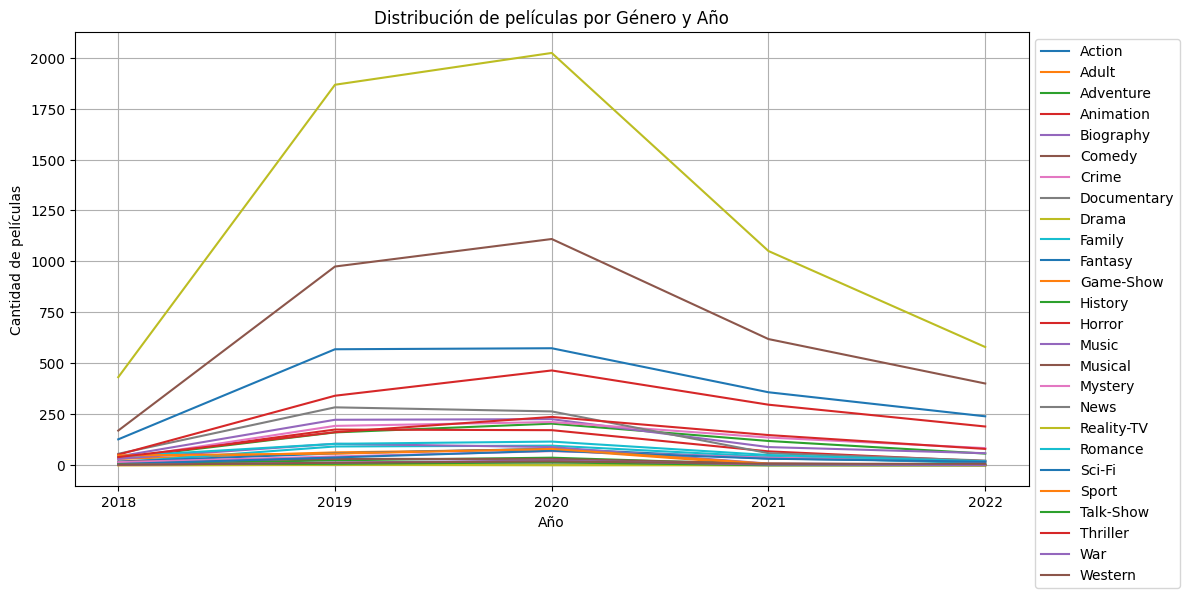

In [69]:
genero_por_anio = df1.groupby(['startYear', 'genres']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(12, 6))

for genre in genero_por_anio.columns:
    ax.plot(genero_por_anio.index, genero_por_anio[genre], label=genre)

ax.set_xlabel('Año')
ax.set_ylabel('Cantidad de películas')
ax.set_title('Distribución de películas por Género y Año')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.grid()
plt.tight_layout()
plt.show()

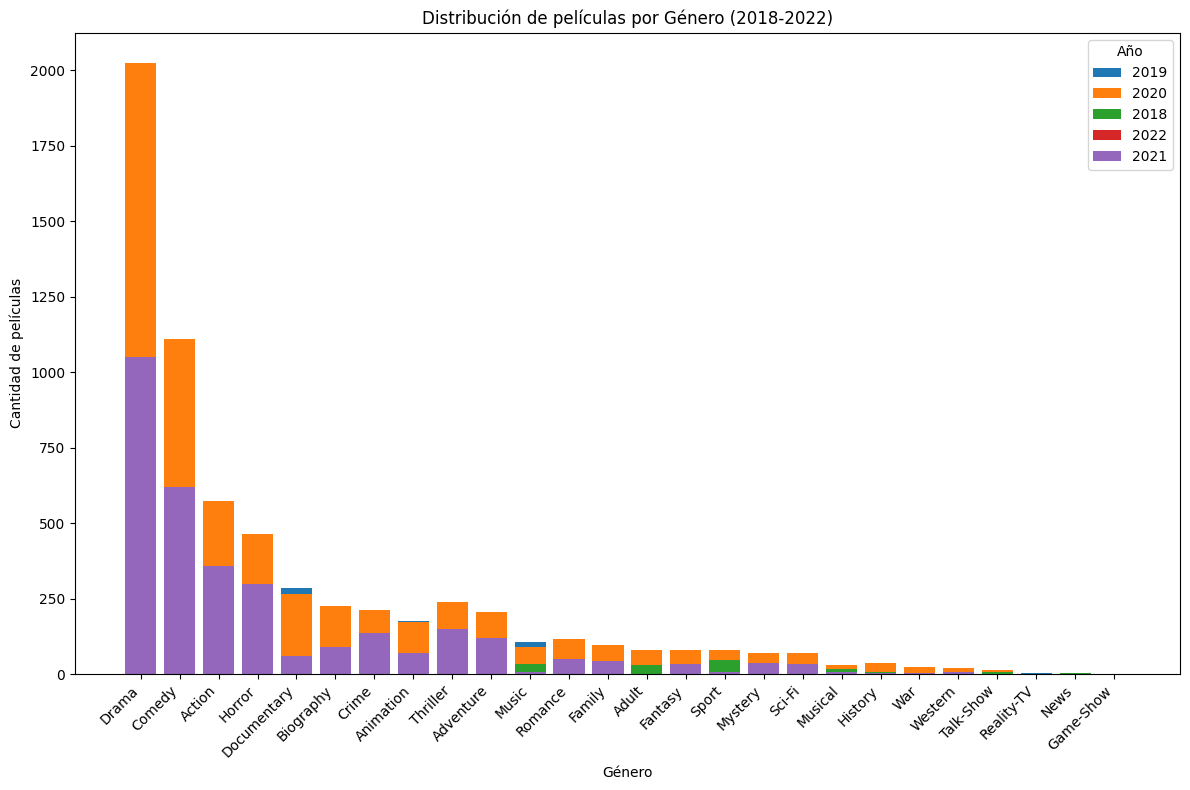

In [70]:
anio = df1['startYear'].unique()
plt.figure(figsize=(12, 8))

for year in anio:
    year_data = df1[df1['startYear'] == year]
    conteo_genero = year_data['genres'].value_counts()
    plt.bar(conteo_genero.index, conteo_genero.values, label=str(year))

plt.xlabel('Género')
plt.ylabel('Cantidad de películas')
plt.title('Distribución de películas por Género (2018-2022)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Año')

plt.tight_layout()
plt.show()

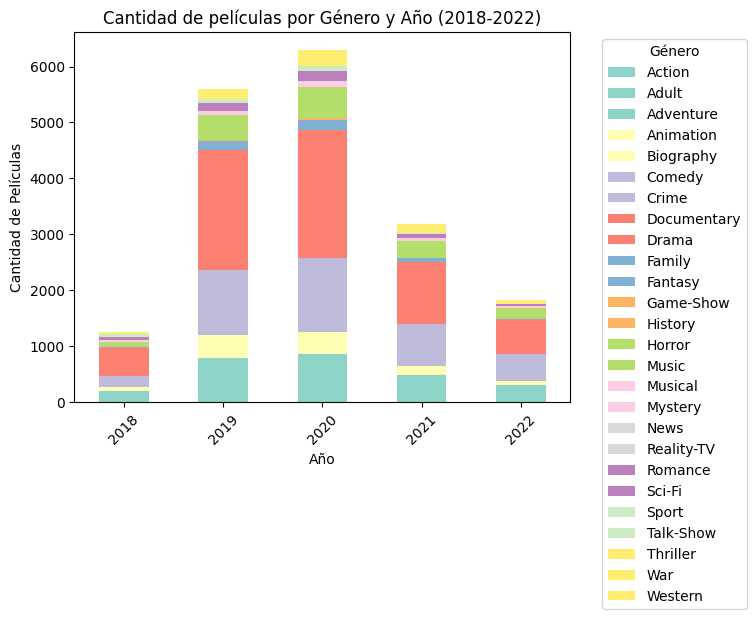

In [71]:
pivot_table = pd.pivot_table(df1, values='primaryTitle', index='startYear', columns='genres', aggfunc='count')
pivot_table.plot(kind='bar', stacked=True, colormap='Set3')
plt.title('Cantidad de películas por Género y Año (2018-2022)')
plt.xlabel('Año')
plt.ylabel('Cantidad de Películas')
plt.legend(title='Género', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

# Conclusiones:
- primero: qué dificil decidir como organizar la información para visualizarla! (necesito más práctica)
- en el año 2020 realmente se estrenaron una cantidad llamativa de películas.
- la imposibilidad de rodar durante pandemia afectó dráticamente el número de estrenos en el 2021
- me encantaría saber qué sucedió en la industria en el 2017 para que en el 2018 se estrenaran tan pocos títulos.
- los tres géneros que más se producen son Drama, Comedia y Acción

**Ejercicio 6**\
Realizar analisis de matriz corelacion y explicar que variable estan correlacionadas

Bueno, creo que no escogí el data set adecuado para este ejercicio, ya que no tengo practicamente variables numéricas.\
A mí me interesa ver si hay relación entre el género de una película y su puntaje o rating. Por lo que voy a tomar valores de dos data set y combinarlos en un único data frame para ver si puedo hacer este ejercicio.

Dataset: https://datasets.imdbws.com/ \

utilizaré el archivo title.basics.tsv y el title.ratings.tsv

El data set title.ratings.tsv contiene información del promedio de puntaje (rating) y de la cantidad de votos de usuarios para cada producción audiovisual

In [49]:
from google.colab import files
uploaded = files.upload()

Saving title.ratings.tsv to title.ratings.tsv


In [72]:
movierate = '/content/title.ratings.tsv'
df2 = pd.read_csv(movierate, sep='\t')

df2.info()

df2.isnull()
df2.dropna(axis=0,how='any')

df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1343371 entries, 0 to 1343370
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1343371 non-null  object 
 1   averageRating  1343371 non-null  float64
 2   numVotes       1343371 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 30.7+ MB


,tconst,averageRating,numVotes
0,tt0000001,5.7,1990
1,tt0000002,5.8,265
2,tt0000003,6.5,1867
3,tt0000004,5.5,177
4,tt0000005,6.2,2653


In [92]:
# primero tengo que combinar el df1 con este df2 para que las películas coincidan
#la variable que se repite en ambos es tconst que es el indicador alfanumerico de las peliculas

df_combined = df1.merge(df2[['tconst', 'averageRating', 'numVotes']], on='tconst', how='inner')

df_combined.head()


,tconst,primaryTitle,titleType,startYear,genres,averageRating,numVotes
0,tt0062336,The Tango of the Widower and Its Distorting Mi...,movie,2020,Drama,6.4,179
1,tt0069049,The Other Side of the Wind,movie,2018,Drama,6.7,7806
2,tt0096235,Taxi Killer,movie,2022,Action,5.8,64
3,tt0119830,One Dog Day,movie,2022,Action,7.3,29
4,tt0120589,A Dangerous Practice,movie,2022,Biography,7.1,196


In [93]:
# ahora quiero convertir los valores de la variable 'genres'
# en valores numéricos que pueda utilizar en un mapa de correlación
# porque MI OBJETIVO FINAL con todo este TP es visualizar qué géneros obtienen mejor rating y votación

unique_genres = df_combined['genres'].unique()
genre_map = {genre: i for i, genre in enumerate(unique_genres)}
df_combined['genres_id'] = df_combined['genres'].map(genre_map)

df_combined.head()


,tconst,primaryTitle,titleType,startYear,genres,averageRating,numVotes,genres_id
0,tt0062336,The Tango of the Widower and Its Distorting Mi...,movie,2020,Drama,6.4,179,0
1,tt0069049,The Other Side of the Wind,movie,2018,Drama,6.7,7806,0
2,tt0096235,Taxi Killer,movie,2022,Action,5.8,64,1
3,tt0119830,One Dog Day,movie,2022,Action,7.3,29,1
4,tt0120589,A Dangerous Practice,movie,2022,Biography,7.1,196,2


In [109]:
unique_genres = df_combined[['genres', 'genres_id']].drop_duplicates()
print(unique_genres)


           genres  genres_id
0           Drama          0
2          Action          1
4       Biography          2
5          Comedy          3
11         Horror          4
18          Crime          5
31      Adventure          6
32    Documentary          7
35         Sci-Fi          8
46        Fantasy          9
64         Family         10
93          Music         11
95        Musical         12
102       Mystery         13
145      Thriller         14
162     Animation         15
164       Romance         16
428         Adult         17
713       History         18
934       Western         19
1763          War         20
1766        Sport         21
7780    Talk-Show         22


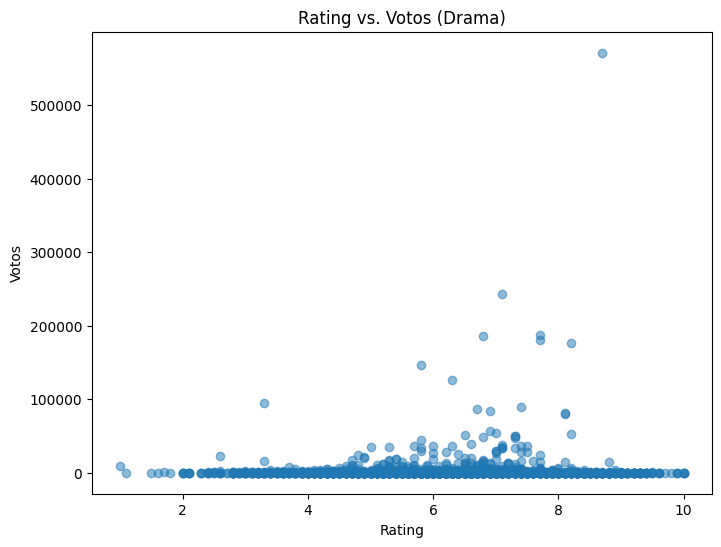

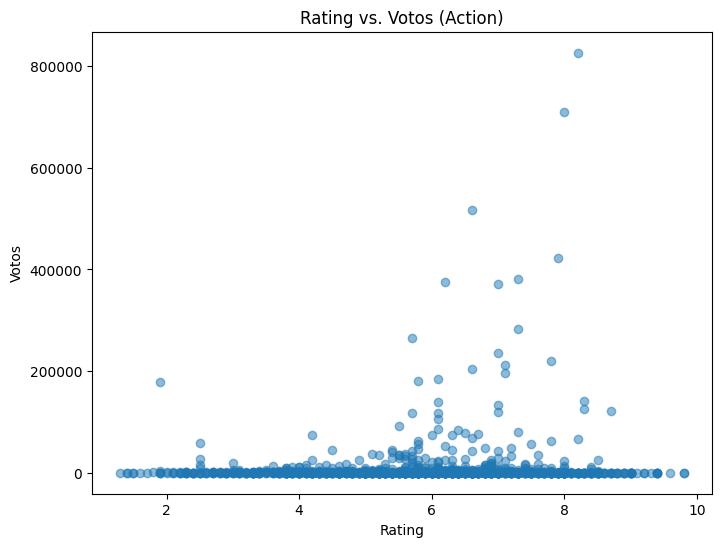

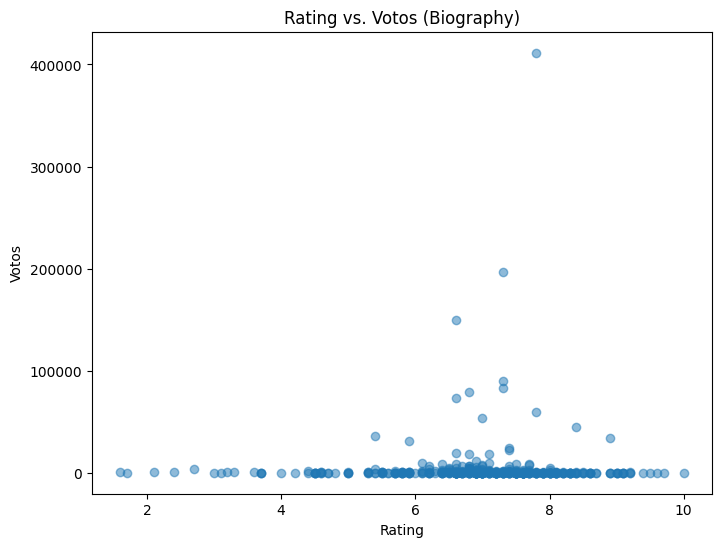

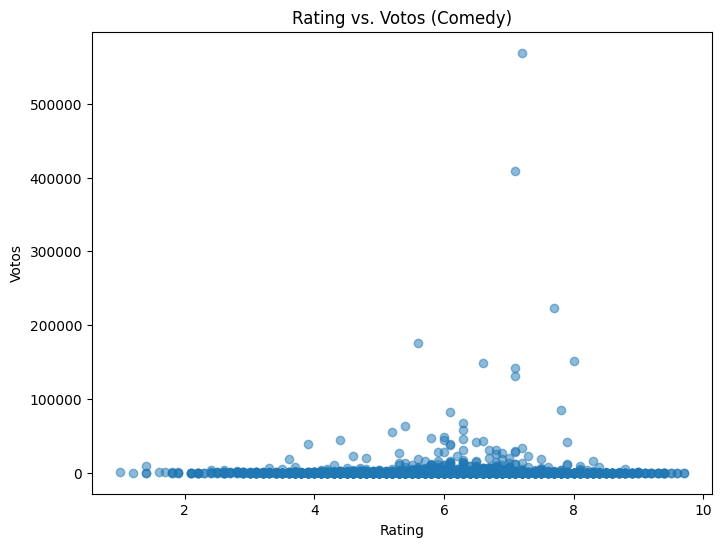

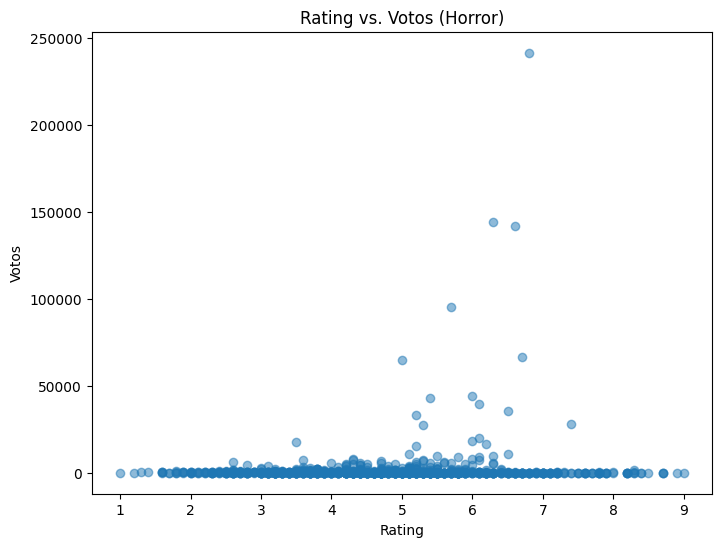

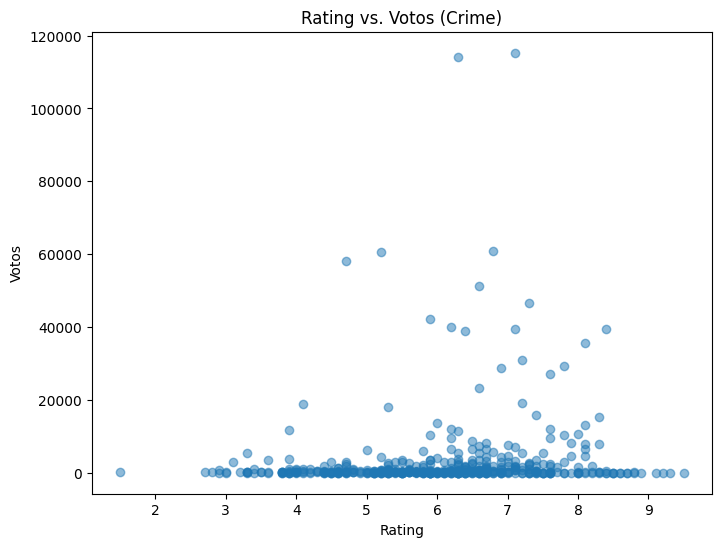

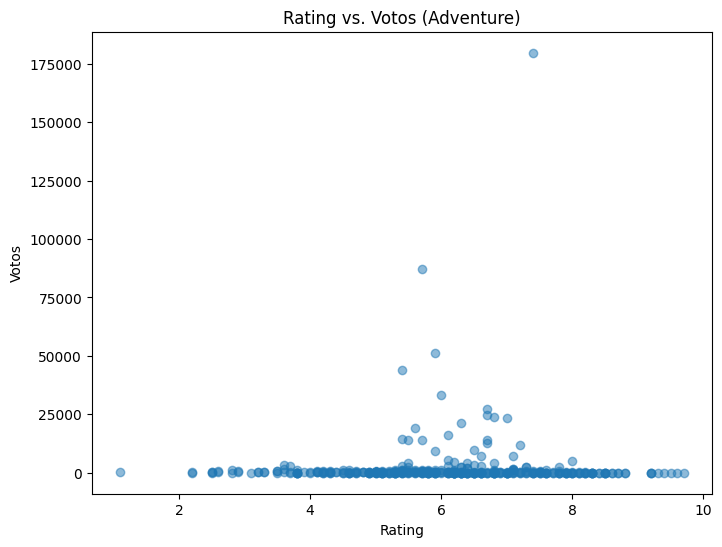

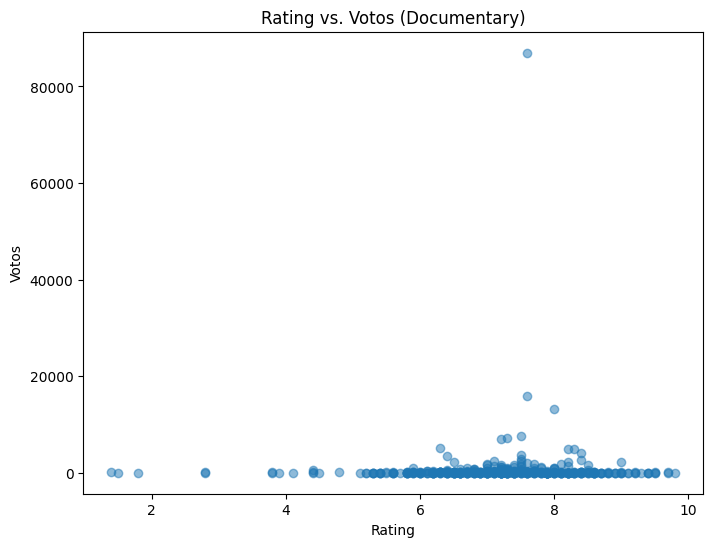

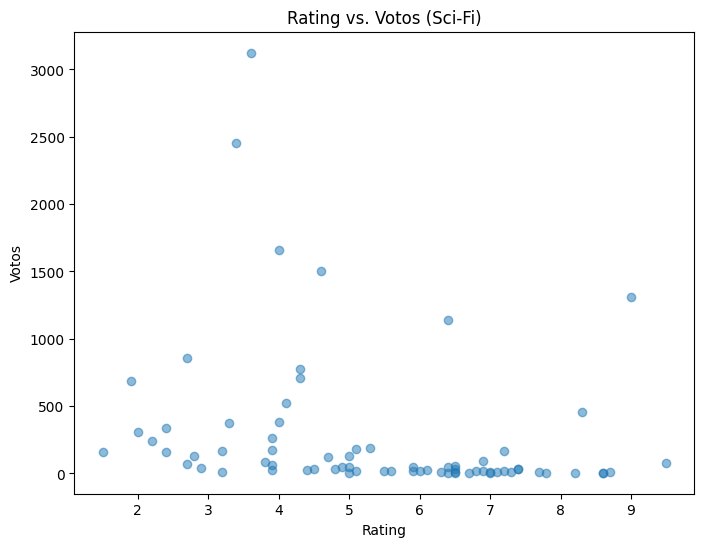

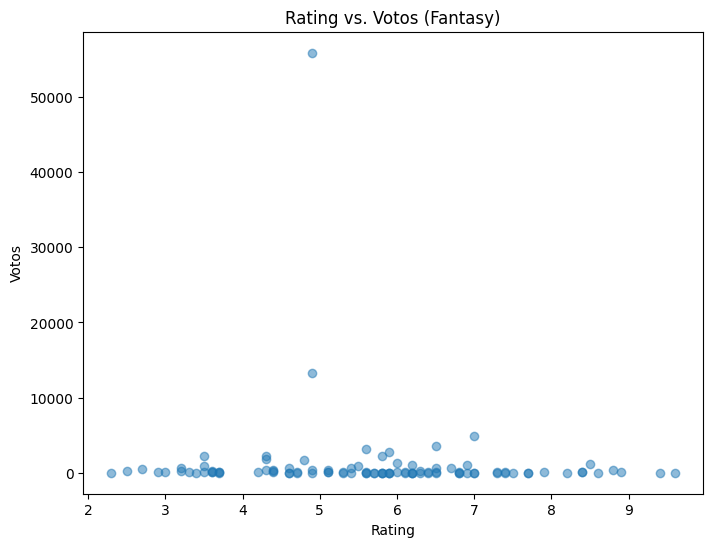

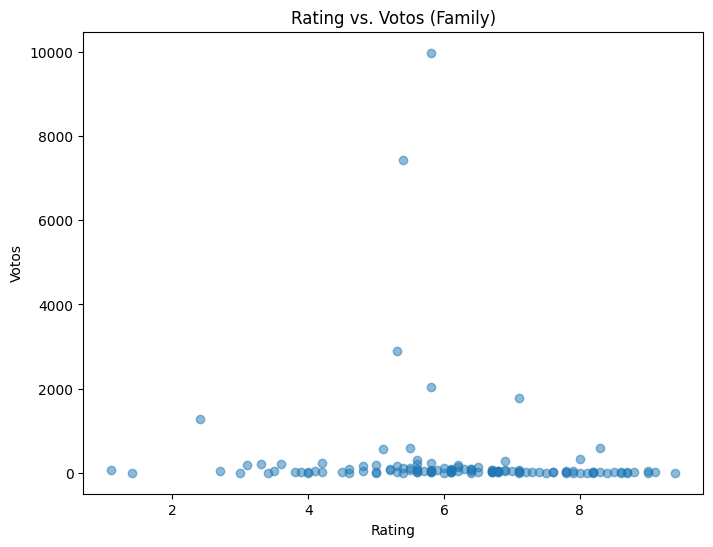

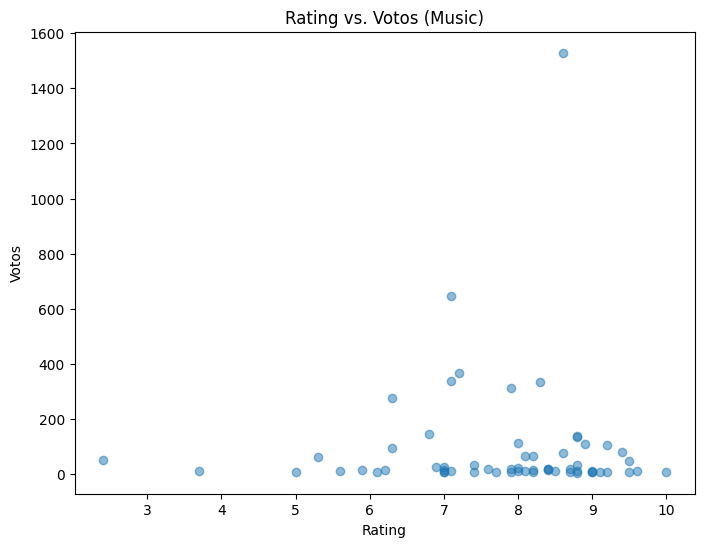

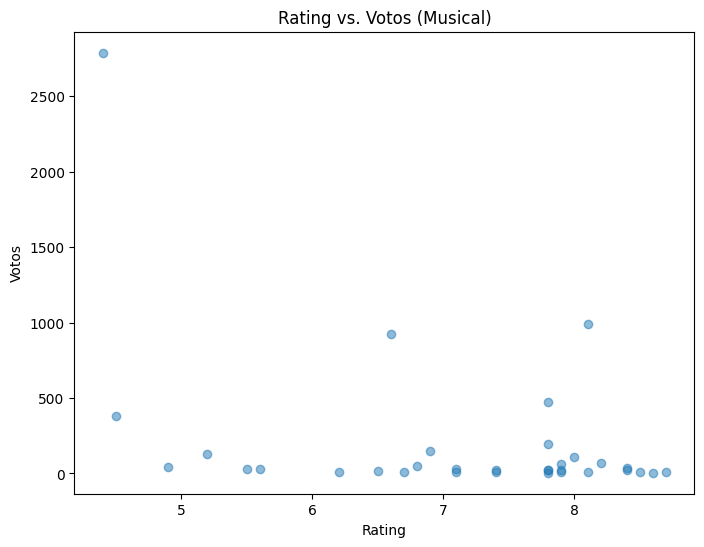

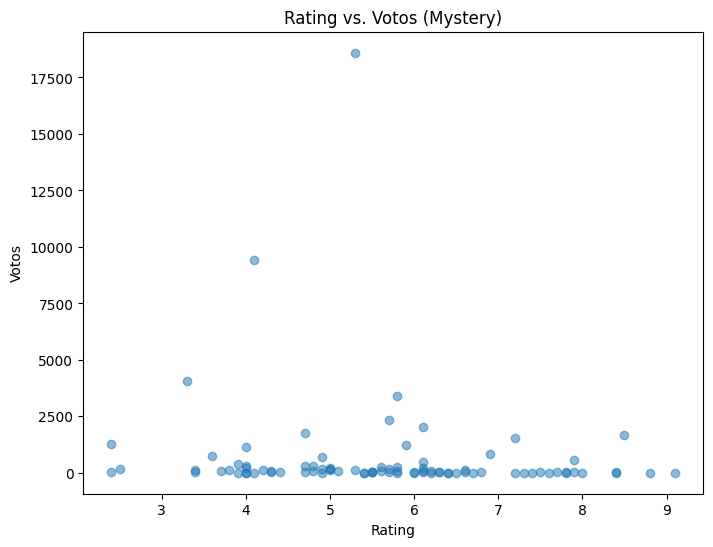

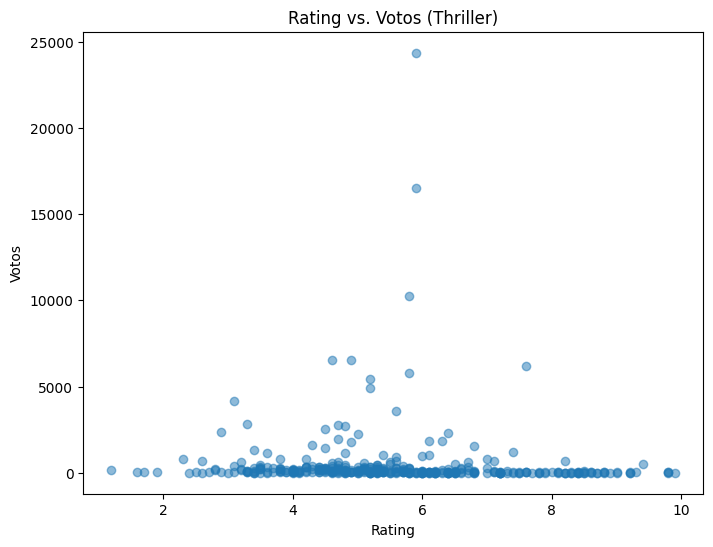

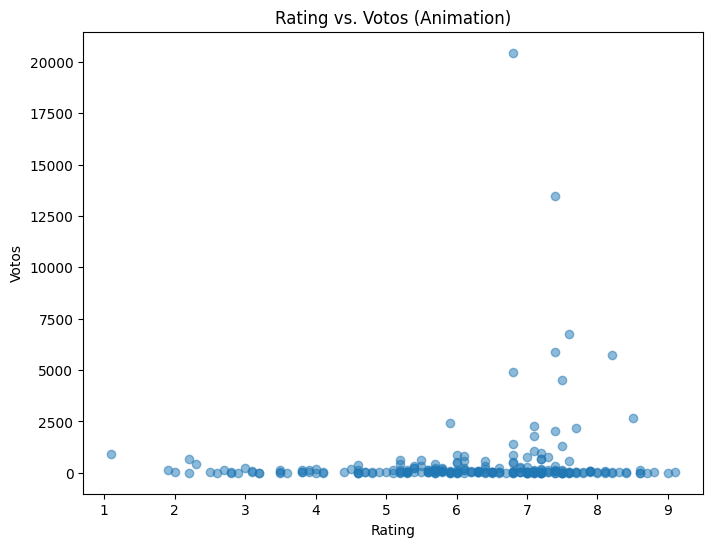

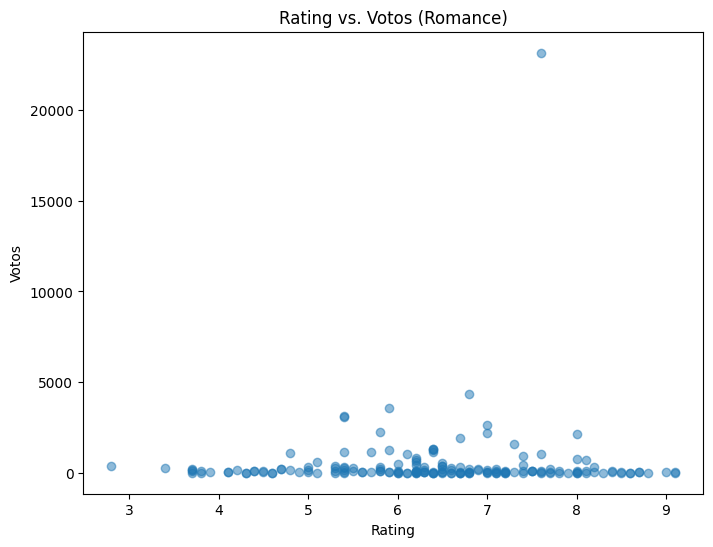

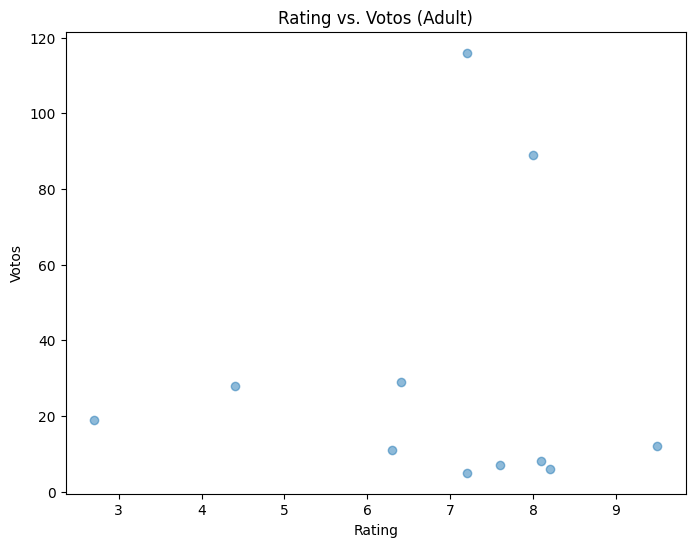

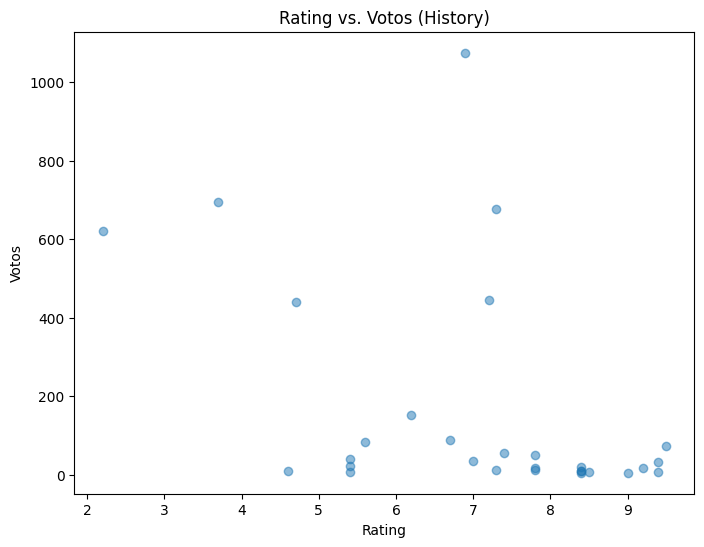

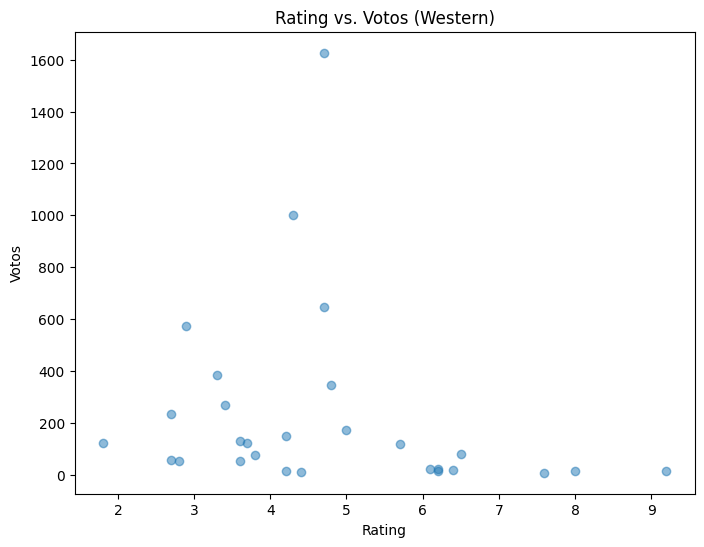

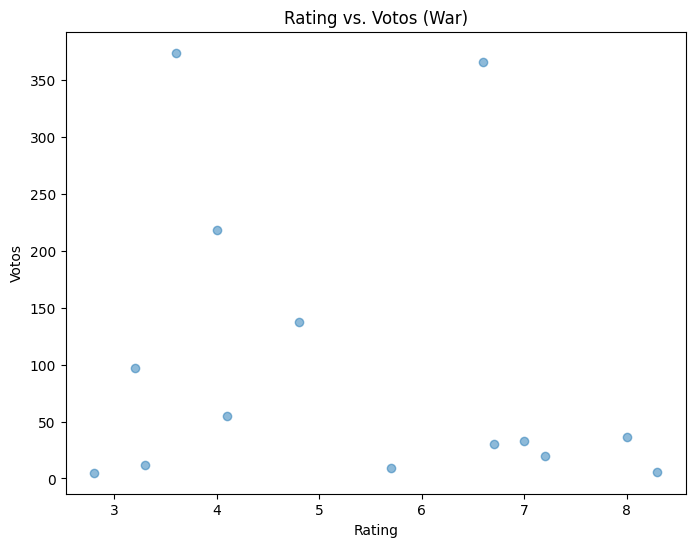

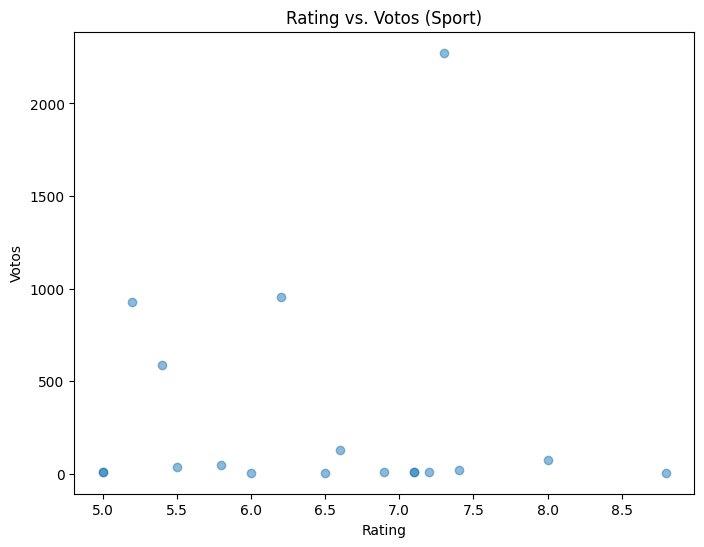

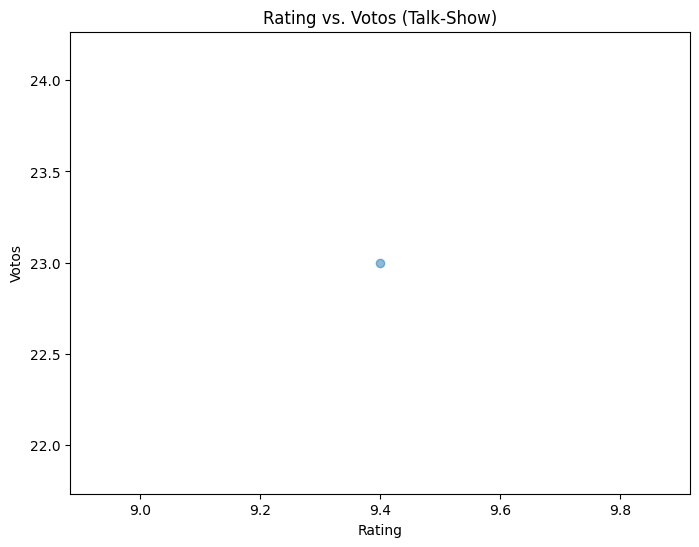

In [108]:
columns = ['averageRating', 'numVotes', 'genres', 'genres_id']
df_selected = df_combined[columns]

correlation_matrix = df_selected.groupby('genres_id').corr(numeric_only=True)

unique_genres_ids = df_combined['genres_id'].unique()
for genres_id in unique_genres_ids:
    df_filtered = df_selected[df_selected['genres_id'] == genres_id]

    average_rating = df_filtered['averageRating']
    num_votes = df_filtered['numVotes']
    genre_name = df_filtered['genres'].iloc[0]

    plt.figure(figsize=(8, 6))
    plt.scatter(average_rating, num_votes, alpha=0.5)
    plt.xlabel('Rating')
    plt.ylabel('Votos')
    plt.title(f'Rating vs. Votos ({genre_name})')

    plt.show()


# Conclusión:
Tuve que forzar la información de dos data set para poder lograr una matriz de correlación por una elección errónea de mi parte.\
\
No pude visualizar lo que quería originalmente, que era saber qué géneros obtenían puntuación y votos más altos. La única solución que encontré fue separar por género y eso no me permite visualizar tan claramente lo que busco.\
\
No obstante esto, observar estos gráficos me permite sacar algunas conclusiones individuales como por ejemplo que el género Histórico tiene un consumo bajo (rating) y obtiene puntaje también bajo (votos); o que en el género de Ciencia Ficción obtienen más votos las películas menos populares (rating); o que para el género de Crimen hay una relación más pareja entre el consumo (rating) y el puntaje (votos)\
\
Este tipo de datos es útil para tener en cuenta durante la etapa de desarrollo y preproducción de películas, a la hora de decidir qué guionar, porque principalmente lo que le importa a la Producción es la taquilla.

**Para los que entregan en blanco**

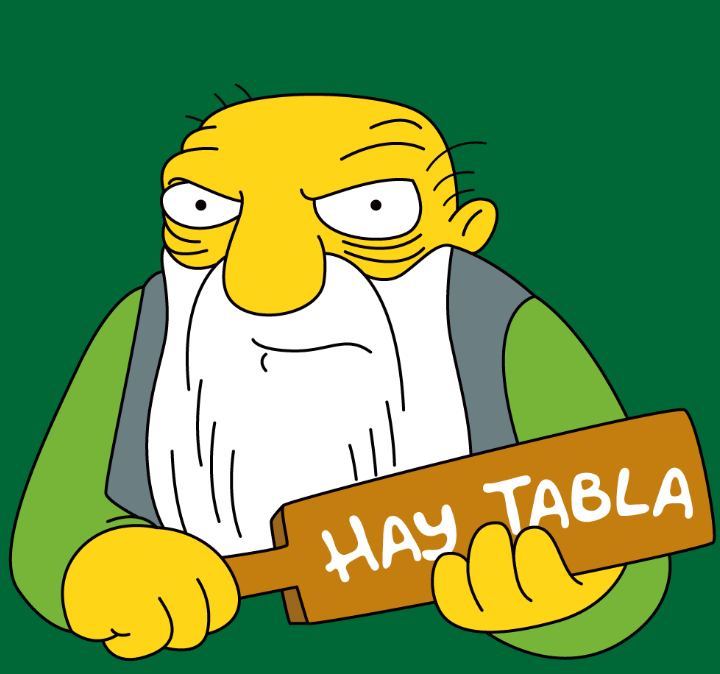